# Open AI Embedding Similarity

In [16]:
import polars as pl
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np

In [2]:
def avg_cosine_similarity(emb, compute_sim=True):
    if compute_sim:
        arr = np.tril(cosine_similarity(emb))
    else:
        arr = emb
    non_zero = np.flatnonzero(arr).size
    return np.sum(arr) * 1./non_zero

## Concepts

In [3]:
wine_c_emb = pl.read_ndjson("/home/upal/Data/ontologies/wines-ontology/embeddings/no_processing/concepts/embeddings.json")
case_c_emb = pl.read_ndjson("/home/upal/Data/ontologies/case-uco-owl-trafficking/embeddings/no_processing/concepts/embeddings.json")
astr_c_emb = pl.read_ndjson("/home/upal/Data/ontologies/astronomy-ontology/embeddings/no_processing/concepts/embeddings.json")

In [139]:
avg_cosine_similarity(np.array(wine_c_emb["Embedding"].to_list()))

np.float64(0.4362658892601013)

In [115]:
avg_cosine_similarity(np.array(case_c_emb["Embedding"].to_list()))

np.float64(0.2820560729677215)

In [116]:
avg_cosine_similarity(np.array(astr_c_emb["Embedding"].to_list()))

np.float64(0.28522128383647277)

In [126]:
embedding_c_array = wine_c_emb["Embedding"].to_list() + case_c_emb["Embedding"].to_list() + astr_c_emb["Embedding"].to_list()

In [128]:
embedded_c = TSNE(n_components=2, learning_rate='auto', metric="cosine",
                  init='pca', perplexity=30).fit_transform(np.array(embedding_c_array))

In [130]:
labels_c = ["blueviolet" for _ in range(wine_c_emb.shape[0])] + ["seagreen" for _ in range(case_c_emb.shape[0])] + ["coral" for _ in range(astr_c_emb.shape[0])]

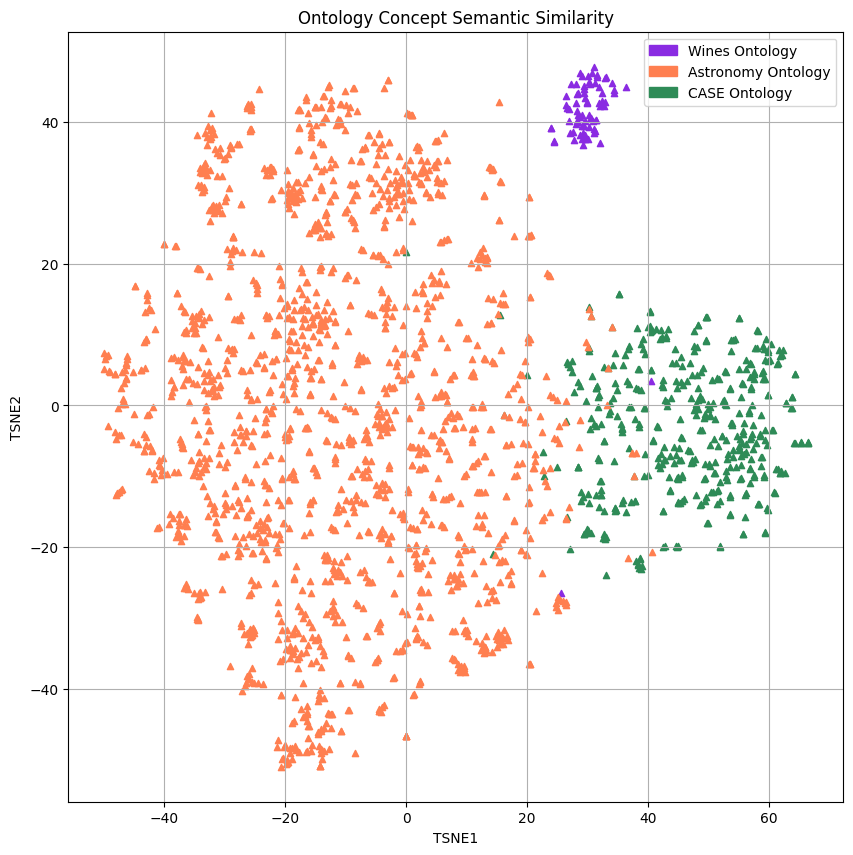

In [208]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
for d, l in zip(embedded_c, labels_c):
    # print(d)
    ax.scatter(d[0], d[1], color=l, s=20, marker="^")
ax.set_title("Ontology Concept Semantic Similarity")
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
wines_patch = mpatches.Patch(color='blueviolet', label='Wines Ontology')
case_patch = mpatches.Patch(color='seagreen', label='CASE Ontology')
astro_patch = mpatches.Patch(color='coral', label='Astronomy Ontology')
ax.legend(handles=[wines_patch,
                    astro_patch,
                    case_patch,
                   ])
plt.savefig("/home/upal/Submissions/ISWC 2025/assets/ontology_concept_semantic_similarity.pdf", format="pdf")

## Individuals

In [4]:
wine_i_emb = pl.read_ndjson("/home/upal/Data/ontologies/wines-ontology/embeddings/no_processing/individuals/embeddings.json")
case_i_emb = pl.read_ndjson("/home/upal/Data/ontologies/case-uco-owl-trafficking/embeddings/no_processing/individuals/embeddings.json")
astr_i_emb = pl.read_ndjson("/home/upal/Data/ontologies/astronomy-ontology/embeddings/no_processing/individuals/embeddings.json")

In [123]:
avg_cosine_similarity(np.array(wine_i_emb["Embedding"].to_list()))

np.float64(0.3537208398715897)

In [124]:
avg_cosine_similarity(np.array(case_i_emb["Embedding"].to_list()))

np.float64(0.487788138470053)

In [125]:
avg_cosine_similarity(np.array(astr_i_emb["Embedding"].to_list()))

np.float64(0.34226446386913556)

In [132]:
embedding_i_array = wine_i_emb["Embedding"].to_list() + case_i_emb["Embedding"].to_list() + astr_i_emb["Embedding"].to_list()

In [133]:
embedded_i = TSNE(n_components=2, learning_rate='auto', metric="cosine",
                  init='pca', perplexity=30).fit_transform(np.array(embedding_i_array))

In [134]:
labels_i = ["blueviolet" for _ in range(wine_i_emb.shape[0])] + ["seagreen" for _ in range(case_i_emb.shape[0])] + ["coral" for _ in range(astr_i_emb.shape[0])]

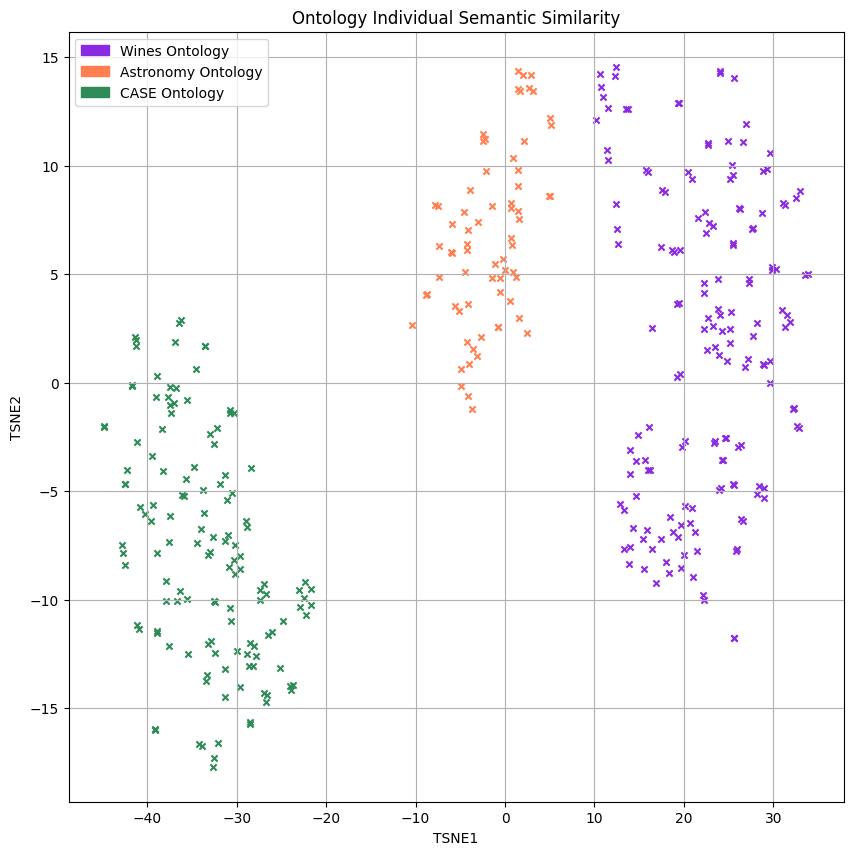

In [210]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
for d, l in zip(embedded_i, labels_i):
    # print(d)
    ax.scatter(d[0], d[1], color=l, s=20, marker="x")
ax.set_title("Ontology Individual Semantic Similarity")
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
wines_patch = mpatches.Patch(color='blueviolet', label='Wines Ontology')
case_patch = mpatches.Patch(color='seagreen', label='CASE Ontology')
astro_patch = mpatches.Patch(color='coral', label='Astronomy Ontology')
ax.legend(handles=[wines_patch,
                    astro_patch,
                    case_patch,
                   ])
plt.savefig("/home/upal/Submissions/ISWC 2025/assets/ontology_individual_semantic_similarity.pdf", format="pdf")

## Intra-Ontology Entity Labels

### Wines Ontology

In [11]:
wine_array = wine_c_emb["Embedding"].to_list() + wine_i_emb["Embedding"].to_list()

In [140]:
avg_cosine_similarity(cosine_similarity(np.array(wine_c_emb["Embedding"].to_list()), np.array(wine_i_emb["Embedding"].to_list())), compute_sim=False)

np.float64(0.3557617704813797)

In [141]:
wine_embedded = TSNE(n_components=2, learning_rate='auto', metric="cosine",
                  init='pca', perplexity=30).fit_transform(np.array(wine_array))

In [212]:
wine_markers = [("^", "red") for _ in range(wine_c_emb.shape[0])] + [("x", "green") for _ in range(wine_i_emb.shape[0])]

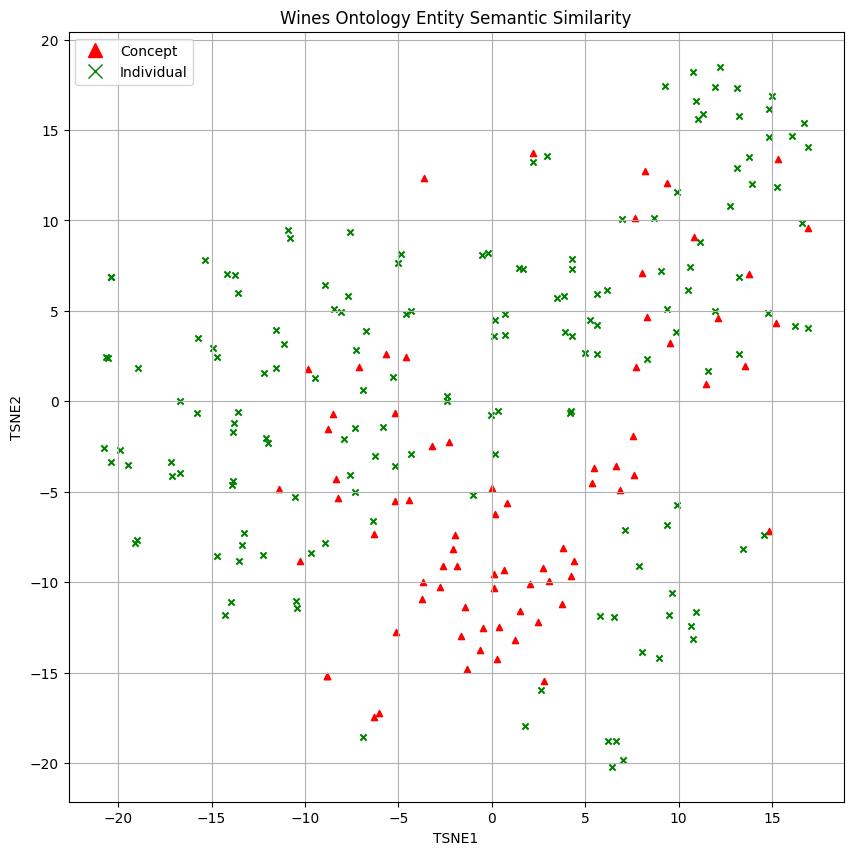

In [214]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
for d, l in zip(wine_embedded, wine_markers):
    # print(d)
    ax.scatter(d[0], d[1], s=20, marker=l[0], c=l[1])
ax.set_title("Wines Ontology Entity Semantic Similarity")
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")

wine_c_patch = mlines.Line2D([], [], color='red', marker='^', linestyle='None',
                          markersize=10, label='Concept')
wine_i_patch = mlines.Line2D([], [], color='green', marker='x', linestyle='None',
                          markersize=10, label='Individual')
ax.legend(handles=[wine_c_patch, wine_i_patch])
plt.savefig("/home/upal/Submissions/ISWC 2025/assets/wines_entity_semantic_similarity.pdf", format="pdf")

### CASE Ontology

In [5]:
case_array = case_c_emb["Embedding"].to_list() + case_i_emb["Embedding"].to_list()

In [6]:
avg_cosine_similarity(cosine_similarity(np.array(case_c_emb["Embedding"].to_list()), np.array(case_i_emb["Embedding"].to_list())), compute_sim=False)

np.float64(0.23646488856882728)

In [7]:
case_embedded = TSNE(n_components=2, learning_rate='auto', metric="cosine",
                  init='pca', perplexity=30).fit_transform(np.array(case_array))

In [13]:
case_markers = [("^", "darkorange") for _ in range(case_c_emb.shape[0])] + [("x", "green") for _ in range(case_i_emb.shape[0])]

In [21]:
matplotlib.rcParams['font.size'] = 20

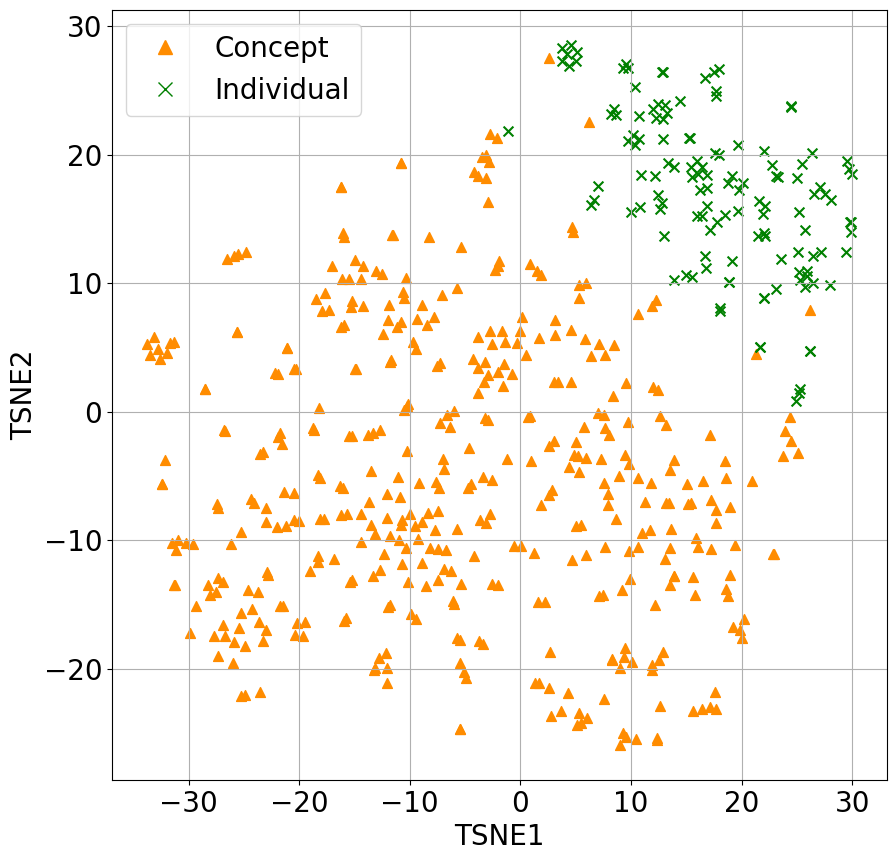

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
for d, l in zip(case_embedded, case_markers):
    # print(d)
    ax.scatter(d[0], d[1], s=50, marker=l[0], c=l[1])
# ax.set_title("CASE Ontology Entity Semantic Similarity")
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
case_c_patch = mlines.Line2D([], [], color='darkorange', marker='^', linestyle='None',
                          markersize=10, label='Concept')
case_i_patch = mlines.Line2D([], [], color='green', marker='x', linestyle='None',
                          markersize=10, label='Individual')
ax.legend(handles=[case_c_patch, case_i_patch])
plt.savefig("/home/upal/Submissions/KDD 2026/assets/case-uco-owl-trafficking-entity-tsne.pdf", format="pdf")

### Astronomy Ontology

In [13]:
astr_array = astr_c_emb["Embedding"].to_list() + astr_i_emb["Embedding"].to_list()

In [176]:
avg_cosine_similarity(cosine_similarity(np.array(astr_c_emb["Embedding"].to_list()), np.array(astr_i_emb["Embedding"].to_list())), compute_sim=False)

np.float64(0.274704117438024)

In [177]:
astr_embedded = TSNE(n_components=2, learning_rate='auto', metric="cosine",
                  init='pca', perplexity=30).fit_transform(np.array(astr_array))

In [218]:
astr_markers = [("^", "red") for _ in range(astr_c_emb.shape[0])] + [("x", "green") for _ in range(astr_i_emb.shape[0])]

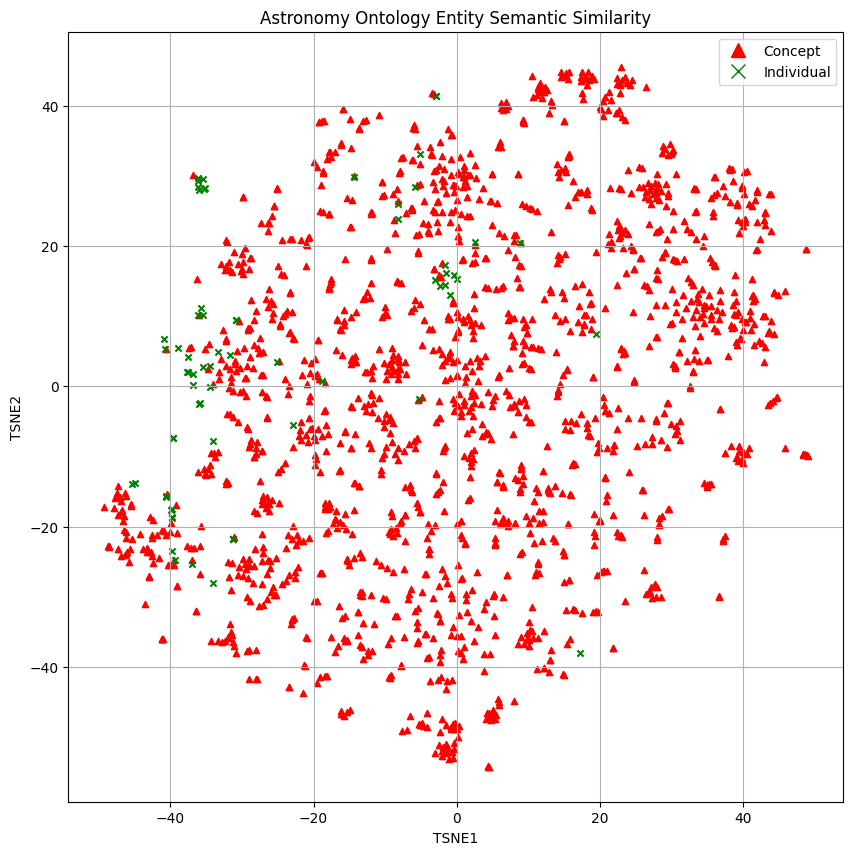

In [219]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
for d, l in zip(astr_embedded, astr_markers):
    # print(d)
    ax.scatter(d[0], d[1], s=20, marker=l[0], c=l[1])
ax.set_title("Astronomy Ontology Entity Semantic Similarity")
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
astr_c_patch = mlines.Line2D([], [], color='red', marker='^', linestyle='None',
                          markersize=10, label='Concept')
astr_i_patch = mlines.Line2D([], [], color='green', marker='x', linestyle='None',
                          markersize=10, label='Individual')
ax.legend(handles=[astr_c_patch, astr_i_patch])
plt.savefig("/home/upal/Submissions/ISWC 2025/assets/astronomy_entity_semantic_similarity.pdf", format="pdf")

## All Entities

In [7]:
all_array = (wine_c_emb["Embedding"].to_list() + case_c_emb["Embedding"].to_list() + astr_c_emb["Embedding"].to_list() +
            wine_i_emb["Embedding"].to_list() + case_i_emb["Embedding"].to_list() + astr_i_emb["Embedding"].to_list())

### TSNE Visualization

In [8]:
all_embedded = TSNE(n_components=2, learning_rate='auto', metric="cosine",
                init='pca', perplexity=30).fit_transform(np.array(all_array))

In [9]:
all_labels = [("blueviolet", "^") for _ in range(wine_c_emb.shape[0])] + [("seagreen", "^") for _ in range(case_c_emb.shape[0])] + [("coral", "^") for _ in range(astr_c_emb.shape[0])] + [("blueviolet", "x") for _ in range(wine_i_emb.shape[0])] + [("seagreen", "x") for _ in range(case_i_emb.shape[0])] + [("coral", "x") for _ in range(astr_i_emb.shape[0])]

In [12]:
plt.rcParams.update({'font.size': 20})

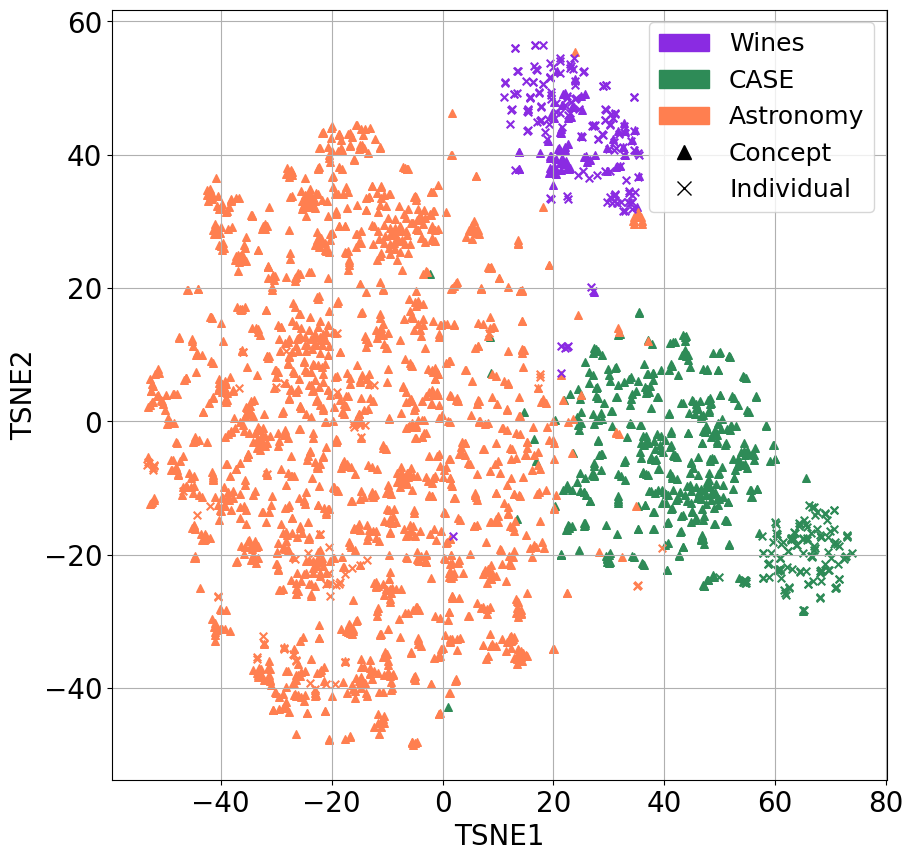

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
for d, l in zip(all_embedded, all_labels):
    # print(d)
    ax.scatter(d[0], d[1], s=30, marker=l[1], c=l[0])
# ax.set_title("All Entities Semantic Similarity")
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
wines_patch = mpatches.Patch(color='blueviolet', label='Wines')
case_patch = mpatches.Patch(color='seagreen', label='CASE')
astro_patch = mpatches.Patch(color='coral', label='Astronomy')
c_patch = mlines.Line2D([], [], color='black', marker='^', linestyle='None',
                          markersize=10, label='Concept')
i_patch = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=10, label='Individual')
ax.legend(handles=[wines_patch, case_patch, astro_patch, c_patch, i_patch], fontsize=18)
plt.savefig("/home/upal/Submissions/ISWC 2025/assets/all_entity_semantic_similarity.pdf", format="pdf")

### K-Means Clustering

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(all_embedded)

In [23]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 1], shape=(2533,), dtype=int32)

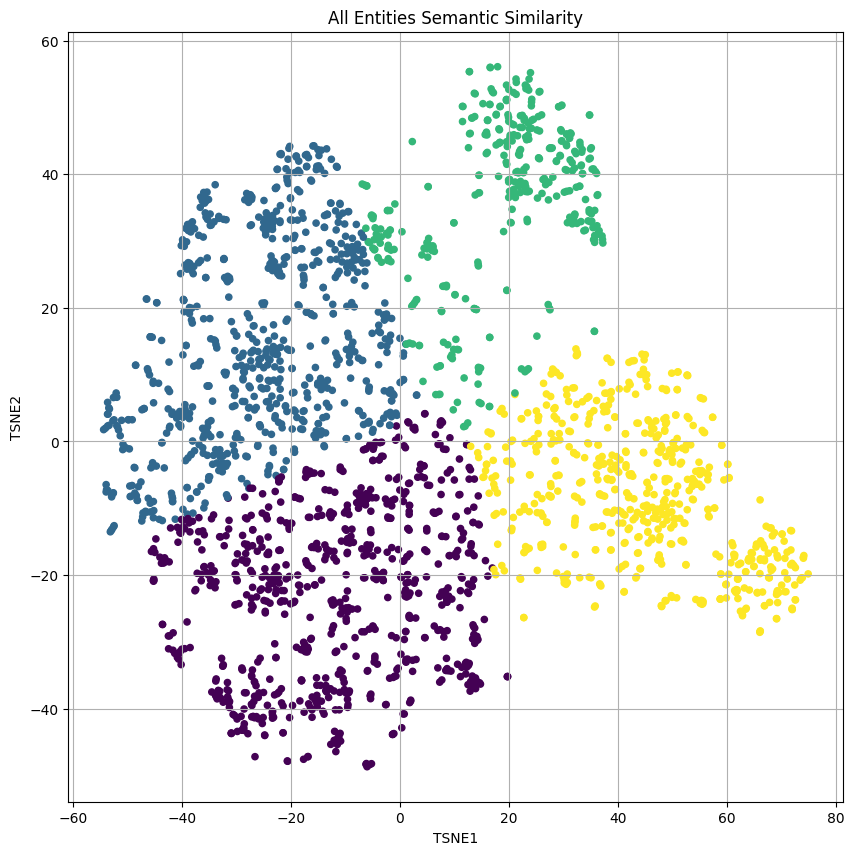

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
# for d, l in zip(all_embedded, kmeans.labels_):
# print(l)
ax.scatter(all_embedded[:,0], all_embedded[:, 1] , s=20, c=kmeans.labels_.astype(float))
ax.set_title("All Entities Semantic Similarity")
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
wines_patch = mpatches.Patch(color='blueviolet', label='Wines Ontology')
case_patch = mpatches.Patch(color='seagreen', label='CASE Ontology')
astro_patch = mpatches.Patch(color='coral', label='Astronomy Ontology')
c_patch = mlines.Line2D([], [], color='black', marker='^', linestyle='None',
                          markersize=10, label='Concept')
i_patch = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=10, label='Individual')
# ax.legend(handles=[wines_patch, case_patch, astro_patch, c_patch, i_patch])
# plt.savefig("/home/upal/Submissions/ISWC 2025/assets/all_entity_semantic_similarity.pdf", format="pdf")

## Silhoutte Score

In [10]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_score(wine_array, labels=[1 for _ in range(len(wine_c_emb["Embedding"].to_list()))] + [2 for _ in range(len(wine_i_emb["Embedding"].to_list()))])

np.float64(0.013222833592486962)

In [18]:
silhouette_score(case_array, labels=[1 for _ in range(len(case_c_emb["Embedding"].to_list()))] + [2 for _ in range(len(case_i_emb["Embedding"].to_list()))])

np.float64(0.06446633998486458)

In [19]:
silhouette_score(astr_array, labels=[1 for _ in range(len(astr_c_emb["Embedding"].to_list()))] + [2 for _ in range(len(astr_i_emb["Embedding"].to_list()))])

np.float64(0.007819692634306827)

## Compactness

In [25]:
import numpy as np

In [26]:
np.var(wine_array)

np.float64(0.00032533539444765976)

In [27]:
np.var(case_array)

np.float64(0.00032546394204059073)

In [28]:
np.var(astr_array)

np.float64(0.0003255189210720654)

## Centroid Distance

In [33]:
wine_c_centroid = np.mean(np.array(wine_c_emb["Embedding"].to_list()), axis=0)
wine_i_centroid = np.mean(np.array(wine_i_emb["Embedding"].to_list()), axis=0)

In [36]:
np.linalg.norm(wine_c_centroid - wine_i_centroid)

np.float64(0.258904383498836)

In [37]:
case_c_centroid = np.mean(np.array(case_c_emb["Embedding"].to_list()), axis=0)
case_i_centroid = np.mean(np.array(case_i_emb["Embedding"].to_list()), axis=0)

In [38]:
np.linalg.norm(case_c_centroid - case_i_centroid)

np.float64(0.5397686331643087)

In [39]:
astr_c_centroid = np.mean(np.array(astr_c_emb["Embedding"].to_list()), axis=0)
astr_i_centroid = np.mean(np.array(astr_i_emb["Embedding"].to_list()), axis=0)

In [40]:
np.linalg.norm(astr_c_centroid - astr_i_centroid)

np.float64(0.2607203870833073)

## Davies Bouldin Score

In [42]:
from sklearn.metrics import davies_bouldin_score

In [43]:
davies_bouldin_score(wine_array, labels=[1 for _ in range(len(wine_c_emb["Embedding"].to_list()))] + [2 for _ in range(len(wine_i_emb["Embedding"].to_list()))])

np.float64(5.995112135344634)

In [44]:
davies_bouldin_score(case_array, labels=[1 for _ in range(len(case_c_emb["Embedding"].to_list()))] + [2 for _ in range(len(case_i_emb["Embedding"].to_list()))])

np.float64(2.8910829312275346)

In [45]:
davies_bouldin_score(astr_array, labels=[1 for _ in range(len(astr_c_emb["Embedding"].to_list()))] + [2 for _ in range(len(astr_i_emb["Embedding"].to_list()))])

np.float64(6.361873610623869)

  Cloning https://github.com/jqmviegas/jqm_cvi.git to /tmp/pip-req-build-5eeui6g9
  Running command git clone --filter=blob:none --quiet https://github.com/jqmviegas/jqm_cvi.git /tmp/pip-req-build-5eeui6g9
  Resolved https://github.com/jqmviegas/jqm_cvi.git to commit 9e1137d4f4df70c1287011e1a544b0c3fe36af36
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "/home/upal/PhD/Experiments/llm_ontology_awareness/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/home/upal/PhD/Experiments/llm_ontology_awareness/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(*